In [ ]:
import pandas as pd  # functions or library for python
from sklearn.model_selection import train_test_split # splitting data arrays into two subsets: for training data and for testing data. 
from sklearn.linear_model import LogisticRegression  # create a Logistic Regression classifier object
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
import seaborn as sn # seaborn uses matplotlib to draw its plots. 
import matplotlib.pyplot as plt # to plot graph 
import warnings


warnings.filterwarnings('ignore')


Health_Scrng = pd.read_csv("new.csv")


#visualizations -uderstanding data 

Health_Scrng.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup
0,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60,29.4,Over Weight,40-60
1,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,61,30.0,Obese,>60
2,23,14532,2,181,95.0,130,90,1,1,1,1,1,0,39,29.0,Over Weight,20-40
3,27,16747,1,158,52.0,110,70,1,3,0,0,1,0,45,20.8,Normal,40-60
4,35,16608,1,170,68.0,150,90,3,1,0,0,1,1,45,23.5,Normal,40-60


In [ ]:
Health_Scrng.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup
10489,99961,22142,2,175,72.0,130,80,1,1,0,0,1,0,60,23.5,Normal,40-60
10490,99965,16843,1,168,75.0,120,79,1,1,0,0,1,0,46,26.6,Over Weight,40-60
10491,99973,18941,1,153,86.0,130,90,1,2,0,0,1,1,51,36.7,Obese,40-60
10492,99975,17926,2,168,80.0,120,80,1,1,0,0,1,1,49,28.3,Over Weight,40-60
10493,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0,56,24.9,Normal,40-60


In [ ]:
Health_Scrng.shape

(10494, 17)

In [ ]:
Health_Scrng.describe

<bound method NDFrame.describe of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          8  21914       1     151    67.0    120     80            2     2   
1         12  22584       2     178    95.0    130     90            3     3   
2         23  14532       2     181    95.0    130     90            1     1   
3         27  16747       1     158    52.0    110     70            1     3   
4         35  16608       1     170    68.0    150     90            3     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
10489  99961  22142       2     175    72.0    130     80            1     1   
10490  99965  16843       1     168    75.0    120     79            1     1   
10491  99973  18941       1     153    86.0    130     90            1     2   
10492  99975  17926       2     168    80.0    120     80            1     1   
10493  99999  20540       1     170    72.0    120     80            2     1   

     

In [ ]:
Health_Scrng.nunique()

id             10494
age             5246
gender             2
height            71
weight           138
ap_hi             85
ap_lo             84
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
AgeinYr           26
BMI              346
BMICat             4
AgeGroup           3
dtype: int64

In [ ]:
Health_Scrng.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
AgeinYr        0
BMI            0
BMICat         0
AgeGroup       0
dtype: int64

In [ ]:
corelation = Health_Scrng.corr()

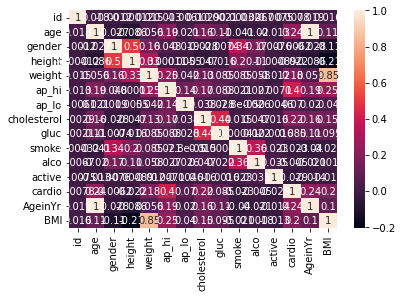

In [ ]:
sn.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot = True)

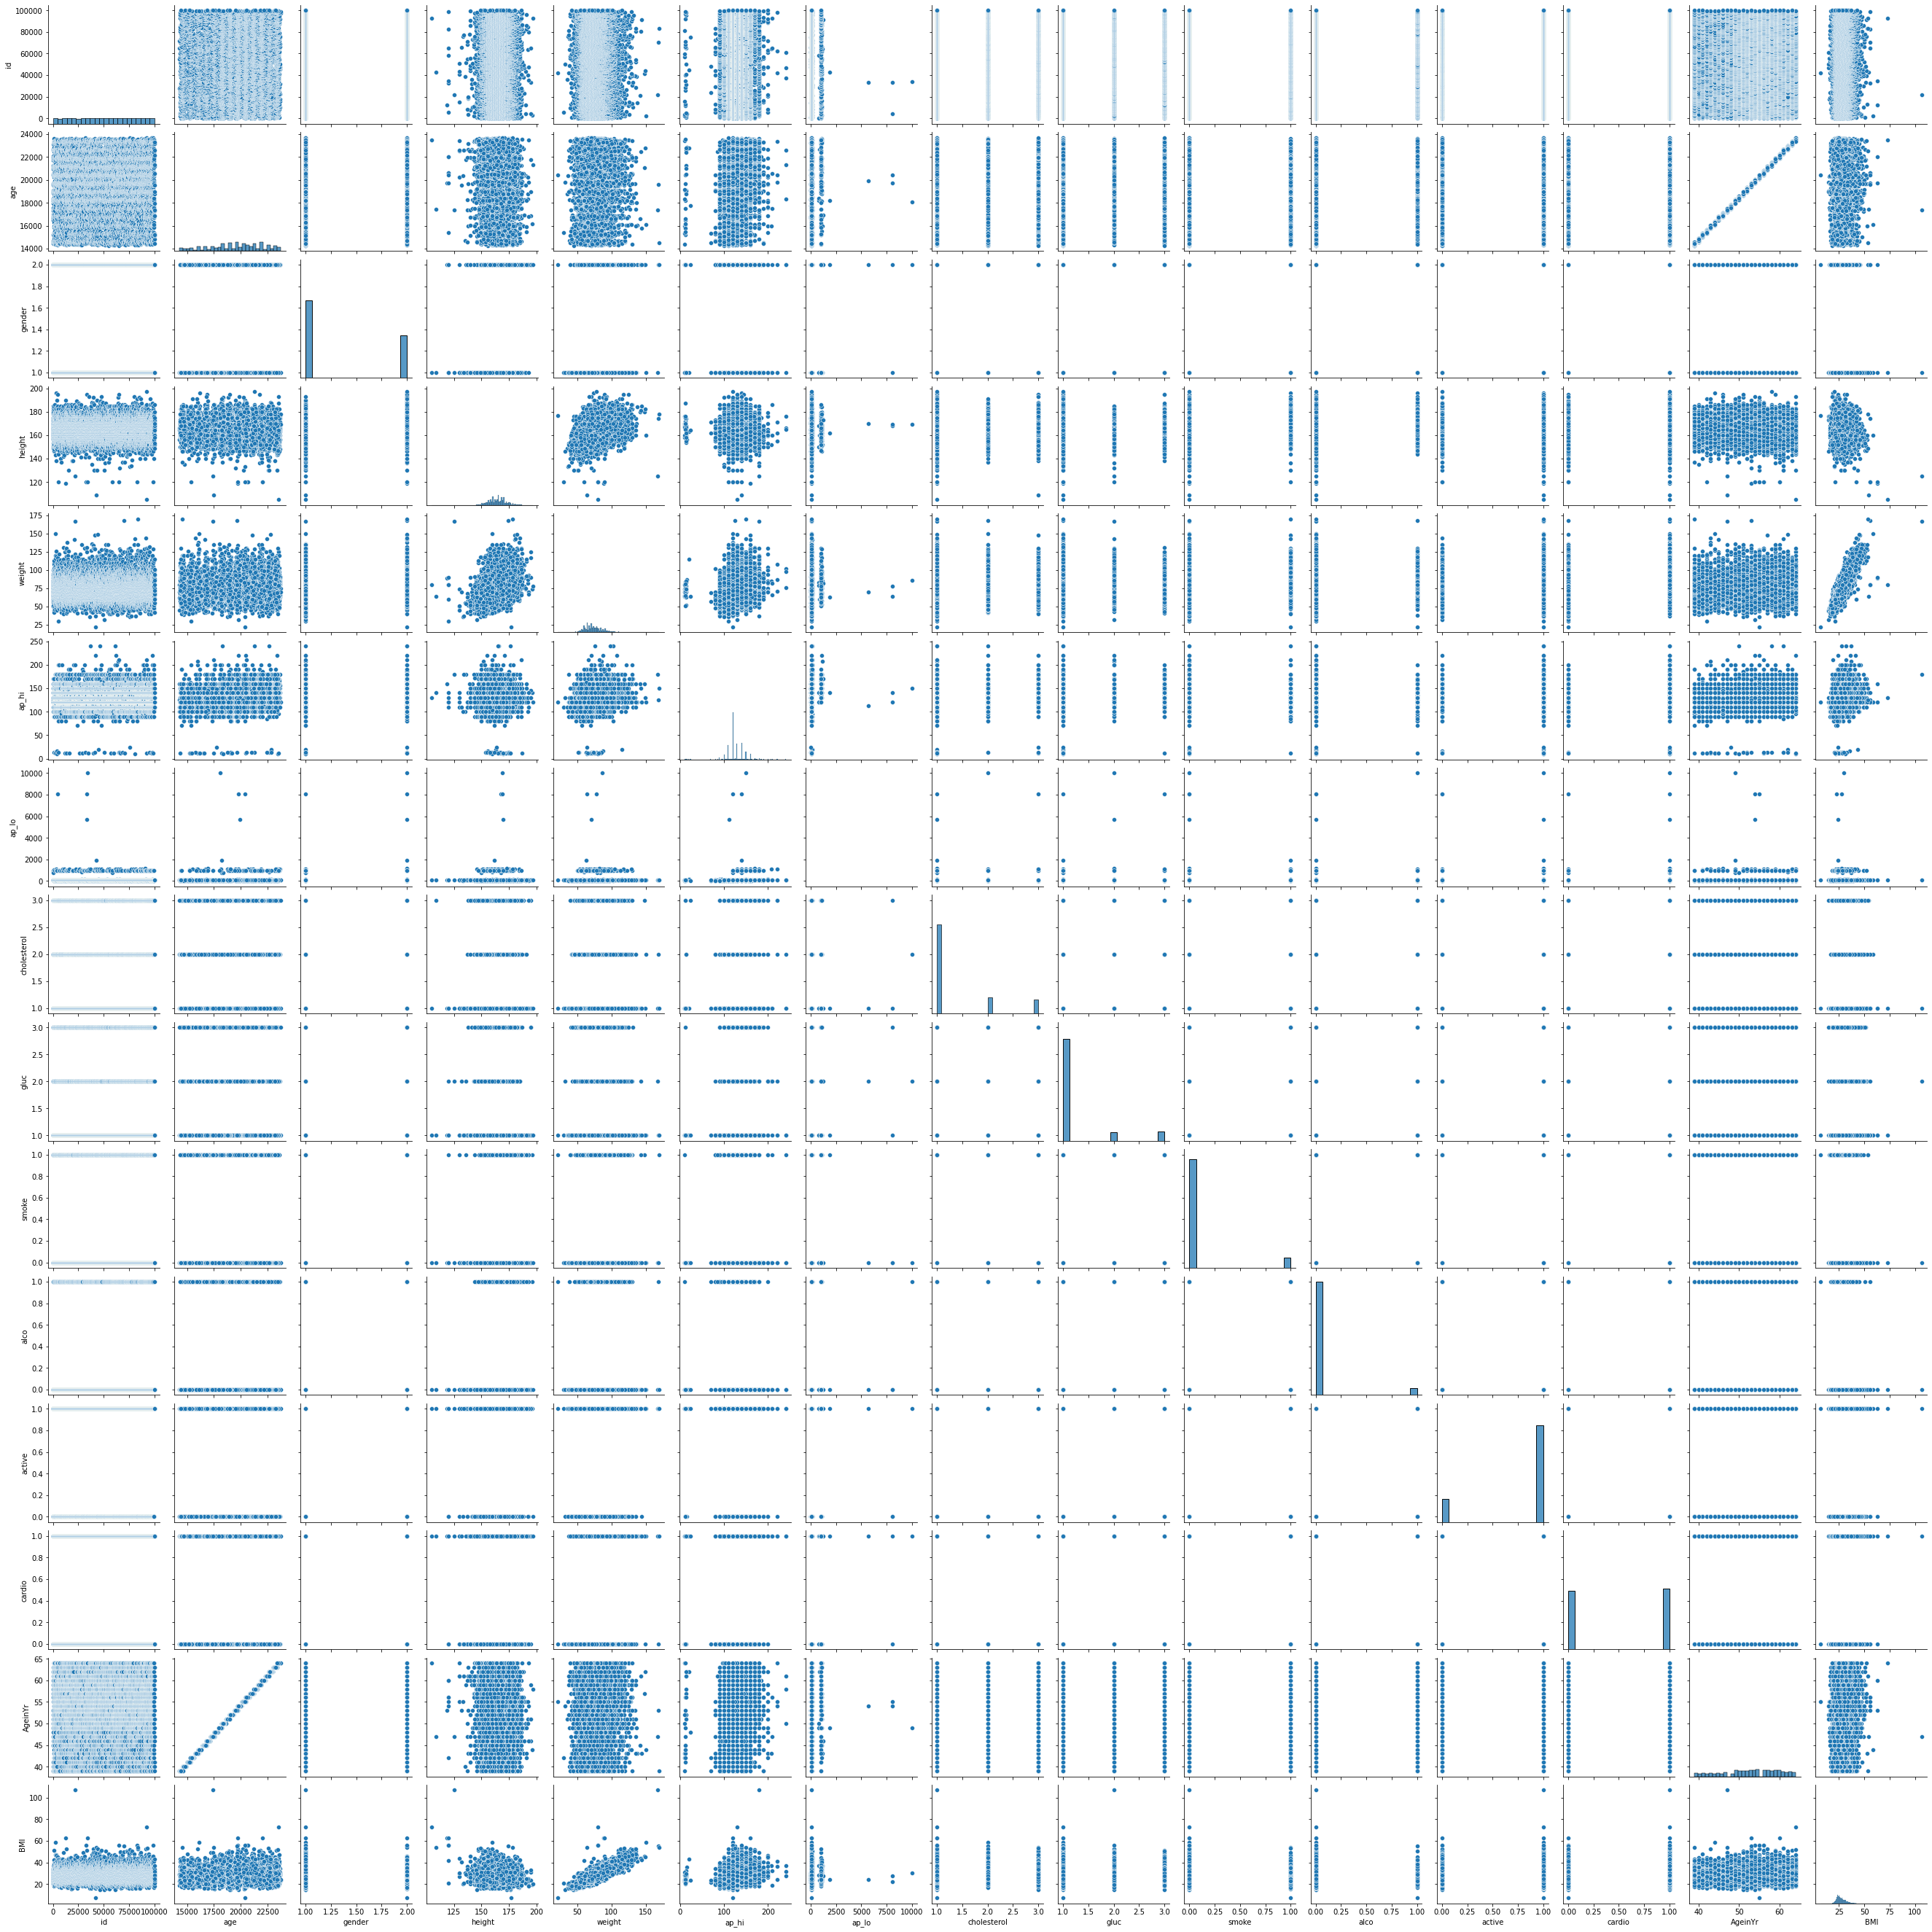

In [ ]:
sn.pairplot(Health_Scrng)

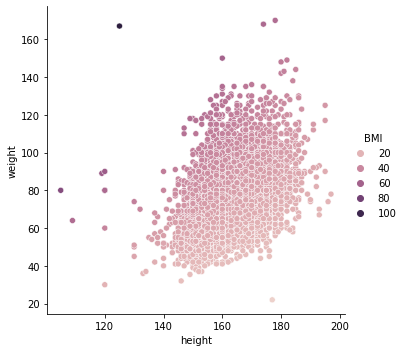

In [ ]:
sn.relplot(x='height', y='weight', hue ='BMI', data=Health_Scrng)

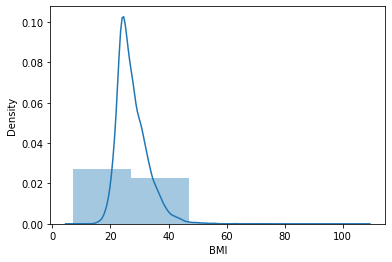

In [ ]:
sn.distplot(Health_Scrng['BMI'], bins=5)

Model Training

Accuracy:  1.0


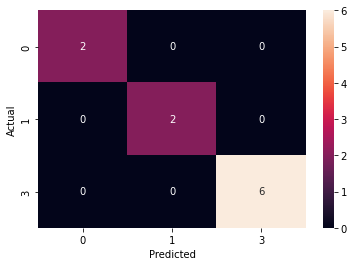

In [ ]:

Health_Scrng['BMICat'] = Health_Scrng['BMICat'].map({'Normal':0,'Obese':1,'Under Weight':2,'Over Weight':3})

df = pd.DataFrame(Health_Scrng,columns= ['AgeinYr','height','weight','BMICat'])

X= Health_Scrng.drop(['age','id','ap_hi','ap_lo','AgeGroup','BMICat'],axis=1)
y = df['BMICat']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=10,random_state=42)

logistic_regression= LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

Health_Scrng = pd.read_csv("new.csv")
Health_Scrng['BMICat'] = Health_Scrng['BMICat'].map({'Normal':0,'Obese':1,'Under Weight':2,'Over Weight':3})

#df = pd.DataFrame(Health_Scrng,columns= ['AgeinYr','height','weight','BMICat','gender'])

#X = df[['AgeinYr','height','weight','BMICat']]
#y = df['gender']  

X= Health_Scrng.drop(['age','id','ap_hi','ap_lo','AgeGroup','BMICat'],axis=1)
y=Health_Scrng['BMICat']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=50,random_state=3)  #train is based on 75% of the dataset, test is based on 25% of dataset



logistic_regression= LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
#print(X)
print (X_test) #test dataset
print (y_pred) #predicted values

       gender  height  weight  cholesterol  gluc  smoke  alco  active  cardio  \
89          1     161    80.0            2     1      0     0       1       1   
9439        1     161    60.0            1     1      0     0       0       0   
8211        1     161    65.0            1     1      0     0       1       0   
7117        1     160    58.0            3     3      0     0       1       0   
9205        1     150    80.0            1     1      0     0       1       1   
4198        1     149    91.0            1     1      0     0       1       0   
9256        2     175    89.0            1     1      0     0       1       1   
1581        1     170    78.0            3     1      0     0       1       1   
9817        2     171    95.0            2     1      0     0       0       1   
7646        1     156    72.0            1     1      0     0       0       1   
3158        1     169    74.0            1     1      0     0       1       1   
8312        1     170    87.

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test,y_train,y_test = tts(X,y)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss="log", max_iter=10000,penalty='l1',random_state=1,alpha=0.0001).fit(X_train,y_train)

In [ ]:
y_pred = sgdc.predict(X_test)
y_pred

array([3, 3, 0, ..., 0, 0, 0])

In [ ]:
sgdc.score(X_train, y_train)

0.9428208386277002

In [ ]:
sgdc.score(X_test,y_test)

0.9375

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_iter':[1000,10000,20000],'penalty':['l1','l2','elasticnet'],'alpha':[0.0001,0.005,0.001]}

grid_search = GridSearchCV(sgdc,params,cv=5)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=SGDClassifier(loss='log', max_iter=10000, penalty='l1',
                                     random_state=1),
             param_grid={'alpha': [0.0001, 0.005, 0.001],
                         'max_iter': [1000, 10000, 20000],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [ ]:
y_pred = sgdc.predict(X_test)
y_pred

array([3, 3, 0, ..., 0, 0, 0])

In [ ]:
sgdc.score(X_train,y_train)

0.9428208386277002

In [ ]:
sgdc.score(X_test,y_test)

0.9375

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
regr=LinearRegression()

In [ ]:
regr.fit(X_train,y_train)

LinearRegression()

In [ ]:
regr.predict(X_test)

array([1.29761024, 1.42837327, 1.10353709, ..., 1.11735136, 1.16115396,
       1.12223421])

In [ ]:
regr.score(X_test,y_test)